In [1]:
#Import the required modules

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt

import cv2

from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!mkdir UTKFace
# !unzip -qq /content/UTKFace.tar.gz
!tar -xf /content/drive/MyDrive/UTKFace.tar.gz -C UTKFace

In [ ]:
# !ls UTKFace
!ls UTKFace/UTKFace

In [2]:
path = "/content/UTKFace/UTKFace"
images=[]
age=[]
gender=[]

Image is Below:



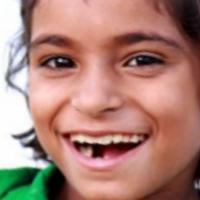

In [ ]:
#Lets print a demo image
from google.colab.patches import cv2_imshow
imgdemo = cv2.imread("/content/UTKFace/UTKFace/9_1_3_20161220222856346.jpg.chip.jpg")
print("Image is Below:\n")
cv2_imshow(imgdemo)

In [ ]:
#Lets print age and gender of random person from dataset
for img in os.listdir(path):
  age_demo = img.split("_")[0]
  gender_demo = img.split("_")[1]
  gender_demo = int(gender_demo)
  break

print("Age is: ",age_demo)
gender_demo_lambda = lambda gd : "Male" if gd==0 else "Female"
print("Gender is: ",gender_demo_lambda(gender_demo)) # gender -> [0 = male and 1 = Female]

Age is:  43
Gender is:  Male


In [12]:

#Extracting images including ages and genders of each image
#Age and Gender are included in image name itself ( " [age]_[gender]_[race]_[date&time].jpg  " )
#For predicting age and gender we should extract it and append to array.

for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(144,144))
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))

In [13]:
age = np.array(age,dtype=np.int64)
images = np.array(images) 
gender = np.array(gender,np.uint64)

In [14]:
#Splitting the data
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [16]:
x_test_gender[1].shape

(144, 144, 3)

In [ ]:
#Define and Build the Sequential model for age prediction

age_model = Sequential()
age_model.add(Conv2D(512, kernel_size=3, activation='relu', input_shape=(144,144,3)))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(64, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(32, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(16, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
# age_model.add(Dropout(0.2))
age_model.add(Dense(128, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age')) # As we are predicting age which is continuous value linear activation is used.

In [ ]:
# Model Summary
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 128)       589952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [ ]:
age_model.compile(optimizer='adam', loss='mse', metrics=['mae']) # loss function here will be mean squared error

In [ ]:
history_age = age_model.fit(x_train_age, y_train_age,validation_data=(x_test_age, y_test_age), epochs=50)

Epoch 1/50
556/556 [==============================] - 96s 166ms/step - loss: 416.4263 - mae: 15.6034 - val_loss: 503.2522 - val_mae: 16.6494
Epoch 2/50
556/556 [==============================] - 86s 155ms/step - loss: 365.9709 - mae: 14.6389 - val_loss: 420.5557 - val_mae: 15.3007
Epoch 3/50
556/556 [==============================] - 86s 155ms/step - loss: 325.6471 - mae: 13.8053 - val_loss: 341.6735 - val_mae: 13.7472
Epoch 4/50
556/556 [==============================] - 86s 155ms/step - loss: 311.7358 - mae: 13.5453 - val_loss: 287.1184 - val_mae: 13.0231
Epoch 5/50
556/556 [==============================] - 89s 160ms/step - loss: 274.3087 - mae: 12.7511 - val_loss: 238.4264 - val_mae: 11.7917
Epoch 6/50
556/556 [==============================] - 89s 160ms/step - loss: 240.2568 - mae: 11.8629 - val_loss: 240.6570 - val_mae: 11.3919
Epoch 7/50
556/556 [==============================] - 88s 159ms/step - loss: 212.8584 - mae: 11.0454 - val_loss: 222.4733 - val_mae: 11.0539
Epoch 8/50
55

In [ ]:
age_model.save("age_model_trained.h5")

In [ ]:
#model for gender detection

gender_model = Sequential()

gender_model.add(Conv2D(512, kernel_size=3, activation='relu', input_shape=(144,144,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(32, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(16, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
# gender_model.add(Dropout(0.2))
gender_model.add(Dense(128, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,validation_data=(x_test_gender, y_test_gender), epochs=50,batch_size=32)

Epoch 1/50
556/556 [==============================] - 109s 165ms/step - loss: 0.8657 - accuracy: 0.6668 - val_loss: 0.5863 - val_accuracy: 0.6995
Epoch 2/50
556/556 [==============================] - 85s 154ms/step - loss: 0.4789 - accuracy: 0.7707 - val_loss: 0.4216 - val_accuracy: 0.8088
Epoch 3/50
556/556 [==============================] - 88s 159ms/step - loss: 0.4170 - accuracy: 0.8126 - val_loss: 0.3993 - val_accuracy: 0.8142
Epoch 4/50
556/556 [==============================] - 85s 153ms/step - loss: 0.3822 - accuracy: 0.8280 - val_loss: 0.3648 - val_accuracy: 0.8406
Epoch 5/50
556/556 [==============================] - 85s 153ms/step - loss: 0.3617 - accuracy: 0.8367 - val_loss: 0.3600 - val_accuracy: 0.8397
Epoch 6/50
556/556 [==============================] - 85s 152ms/step - loss: 0.3507 - accuracy: 0.8443 - val_loss: 0.4164 - val_accuracy: 0.7992
Epoch 7/50
556/556 [==============================] - 85s 152ms/step - loss: 0.3514 - accuracy: 0.8408 - val_loss: 0.3620 - val_a

In [ ]:
gender_model.save("gender_model_trained.h5")

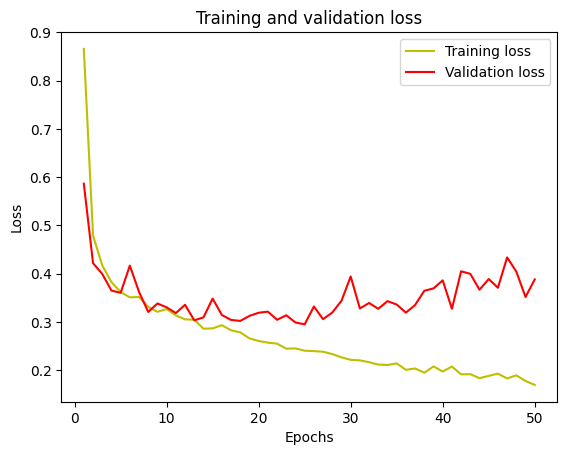

In [ ]:
loss = history_gender.history['loss'] # loss plot for gender prediction model 
val_loss = history_gender.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

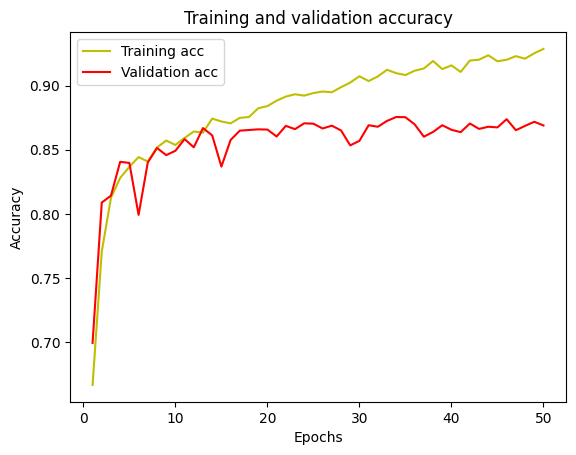

In [ ]:
acc = history_gender.history['accuracy'] # accuracy plot training vs validation accuracy for gender prediction model.
#acc = history.history['accuracy']
val_acc = history_gender.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
gender_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 128)       589952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [ ]:
predictions = gender_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

186/186 [==============================] - 7s 38ms/step
Accuracy =  0.8689050109667623


<Axes: >

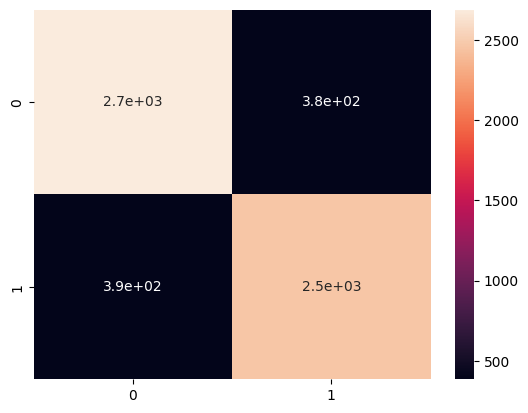

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)

# **Test Cases**

##### **Gender Prediction**

In [2]:
import keras
gender_model = keras.models.load_model('/content/gender_model_trained.h5')

In [3]:
gender_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 128)       589952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [45]:
from keras.preprocessing import *
import keras.utils as image
img = image.load_img('/content/1675168026465.jpg', grayscale=False, target_size=(144, 144))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
     

Image is Below:



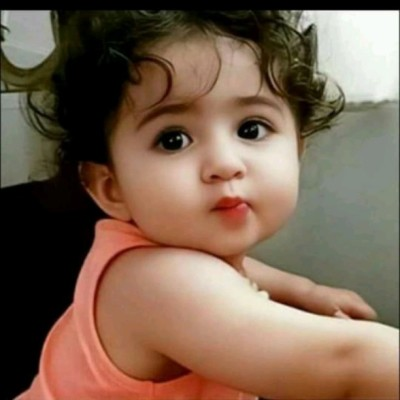

In [24]:
#Lets print a demo image
from google.colab.patches import cv2_imshow
imgdemo2 = cv2.imread("/content/1675168026465.jpg")
print("Image is Below:\n")
cv2_imshow(imgdemo2) #Before passing image to model prediction make sure that you resize image to (144 width,144 height)

In [46]:
prediction = gender_model.predict(img)
if(prediction[0]<0.5):
  print("Gender is Male")
else:
  print("Gender is Female")  

1/1 [==============================] - 0s 19ms/step
Gender is Female


##### **Age Prediction**

In [25]:
import keras
age_model = keras.models.load_model('/content/age_model_trained.h5')

In [26]:
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 128)       589952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [41]:
from keras.preprocessing import *    #same code used for gender as well
import keras.utils as image
img = image.load_img('/content/ajay.jpg', grayscale=False, target_size=(144, 144))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0) #now are are predicting a continuous value -> AGE

In [42]:
prediction_age = age_model.predict(img)
print(prediction_age)

1/1 [==============================] - 0s 18ms/step
[[35.31041]]


## **Conclusion**

The Gender Prediction model is performing well with good accuracy. However Age prediction model can be improved by adding layers or change number of filters or neural network topology.I got somewhat less performance with Age prediction model but it was not bad. The topology which i designed is just as a basic topology and initial stage.